# Sistema Fuzzy - Single Input Single Output (SISO)

![1](https://github.com/alvaromfcunha-c210/aula11/blob/master/imagens/1.png?raw=1)

In [4]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Modelando antecedente:

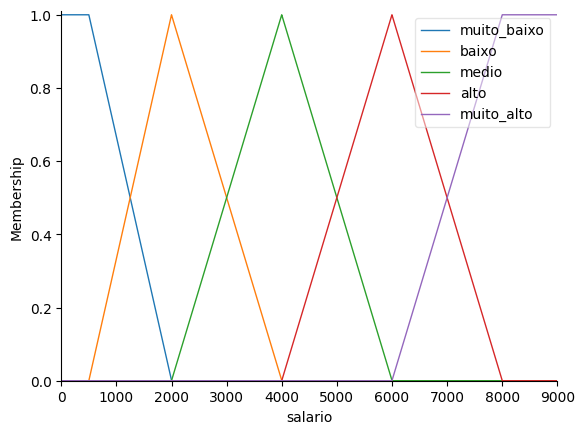

In [5]:
universo = np.arange(0, 9001)

#faixa de valores do salario
salario = control.Antecedent(universe = universo, label = "salario")

salario["muito_baixo"] = fuzzy.trapmf(salario.universe, [0, 0, 500, 2000])
salario["baixo"] = fuzzy.trimf(salario.universe, [500, 2000, 4000])
salario["medio"] = fuzzy.trimf(salario.universe, [2000, 4000, 6000])
salario["alto"] = fuzzy.trimf(salario.universe, [4000, 6000, 8000])
salario["muito_alto"] = fuzzy.trapmf(salario.universe, [6000, 8000, 9000, 9000])

salario.view()

### Modelando consequente:

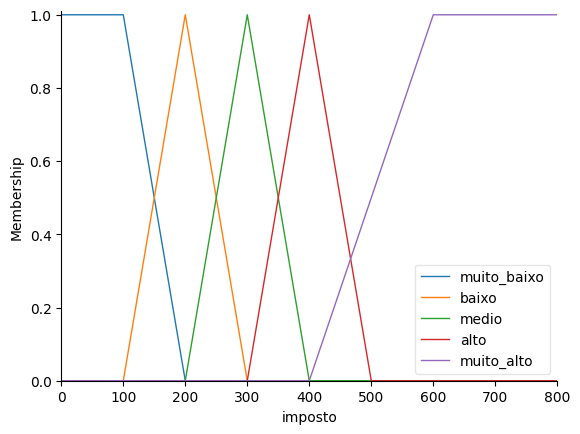

In [9]:
universo_imposto = np.arange(0, 801)

imposto = control.Consequent(universe = universo_imposto, label = "imposto")

imposto["muito_baixo"] = fuzzy.trapmf(imposto.universe, [0, 0, 100, 200])
imposto["baixo"] = fuzzy.trimf(imposto.universe, [100, 200, 300])
imposto["medio"] = fuzzy.trimf(imposto.universe, [200, 300, 400])
imposto["alto"] = fuzzy.trimf(imposto.universe, [300, 400, 500])
imposto["muito_alto"] = fuzzy.trapmf(imposto.universe, [400, 600, 800, 800])

imposto.view()

### Modelando regras de inferência:

In [10]:

regra1 = control.Rule(salario["muito_baixo"], imposto["muito_baixo"])
regra2 = control.Rule(salario["baixo"], imposto["baixo"])
regra3 = control.Rule(salario["medio"], imposto["medio"])
regra4 = control.Rule(salario["alto"], imposto["alto"])
regra5 = control.Rule(salario["muito_alto"], imposto["muito_alto"])

imposto_controle = control.ControlSystem([regra1, regra2, regra3, regra4, regra5])

### Simulação do sistema:

Resultado 'desfuzzificado': 358.47455583692226


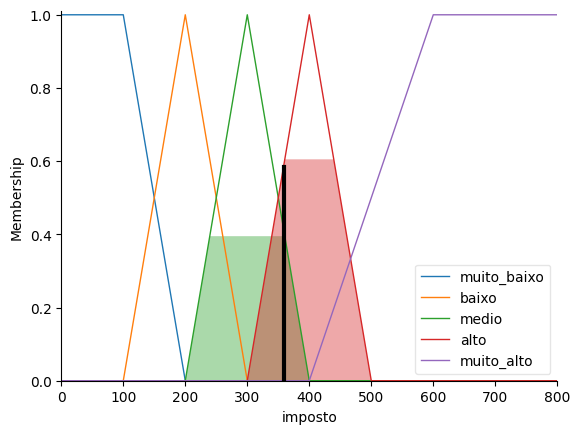

In [8]:
sistema = control.ControlSystemSimulation(imposto_controle)

sistema.input["salario"] = 5210

sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['imposto']}")

imposto.view(sim = sistema)